In [1]:
import pandas as pd
import numpy as np
from os import listdir
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import holidays
from datetime import date
from sklearn.metrics import accuracy_score 


# EDA

### READ DATA

In [2]:
all_df = pd.read_pickle('all_df.pkl')

we have a total of 11,220,058 rows of data

In [3]:
len(all_df)

11220058

### OUTLIER ANALYSIS

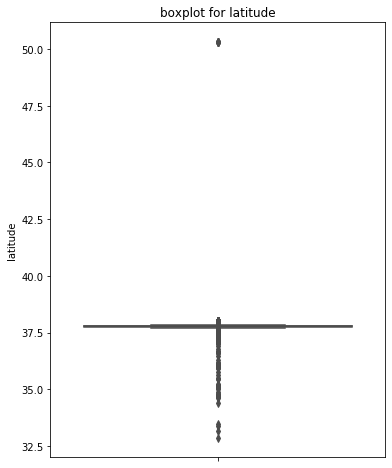

In [4]:
plt.figure(figsize=(6, 8))
ax = sns.boxplot(y=all_df['latitude'] ,palette="Set1").set_title('boxplot for latitude')

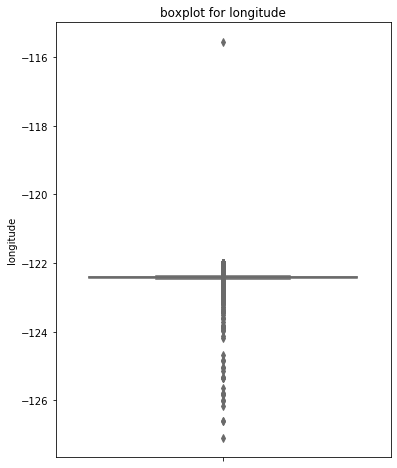

In [5]:
plt.figure(figsize=(6, 8))
ax = sns.boxplot(y=all_df['longitude'],palette="Set3").set_title('boxplot for longitude')

There are some outliers detected by box plot from tha data. when I checked them some of them are in ocean and even not in san francisco. Maybe there is a GPS error. Therefore I restricted my data with San Francisco border latitude and longitude values.

In [6]:
san_francisco_df = all_df[(all_df['latitude']>37.1897)&(all_df['latitude']<38.2033)&(all_df['longitude']>-122.6445)&(all_df['longitude']<-121.5871)]

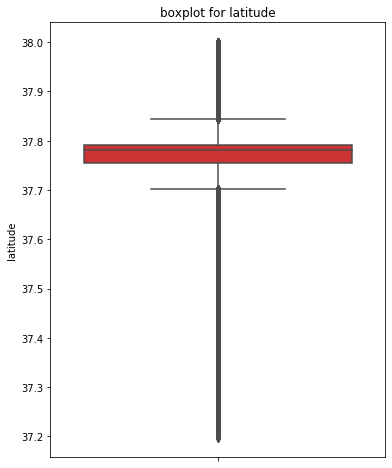

In [7]:
plt.figure(figsize=(6, 8))
ax = sns.boxplot(y=san_francisco_df['latitude'] ,palette="Set1").set_title('boxplot for latitude')

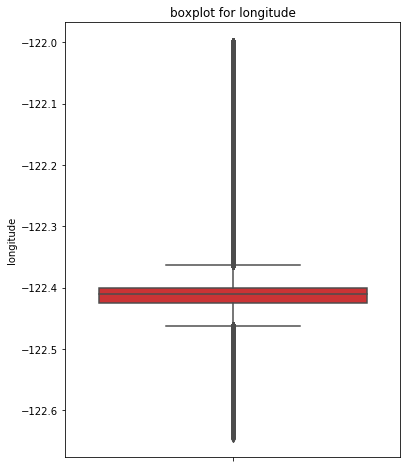

In [8]:
plt.figure(figsize=(6, 8))
ax = sns.boxplot(y=san_francisco_df['longitude'] ,palette="Set1").set_title('boxplot for longitude')

In [9]:
all_df.shape

(11220058, 15)

In [10]:
san_francisco_df.shape

(11219848, 15)

around 10k rows are affected when we restricted with San Francisco area

### DAY OF WEEK DISTRIBUTION

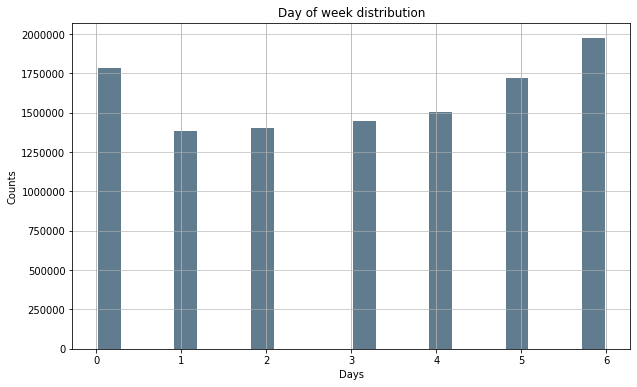

In [11]:
san_francisco_df.day_of_week.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(10,6))
plt.title('Day of week distribution')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

### OCCUPANCY DISTRUBTION

#### Distribution of occupancy nearly balanced as we see from pie chart

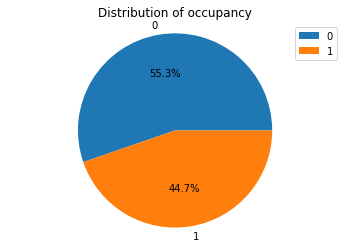

In [12]:
plt.pie(san_francisco_df.occupation.value_counts(),labels=[0,1],autopct='%1.1f%%')
plt.title('Distribution of occupancy')
plt.axis('equal')
plt.legend()
plt.show()

In [13]:
san_francisco_df.occupation.value_counts()

0    6202087
1    5017761
Name: occupation, dtype: int64

### Baseline Calculation

In [14]:
all_df['location'] = all_df.latitude.round(2).astype('str') + all_df.longitude.round(2).astype('str')
baseline_df = all_df[(all_df['occupation']==0)&(all_df['previous_occupation_status']==1)]
print ('percentage of customers who hail cab at the same location :',accuracy_score(baseline_df['target_column'], baseline_df['location']) )


percentage of customers who hail cab at the same location : 0.3232772466126998


### Scatterplot for both all df and San Francisco

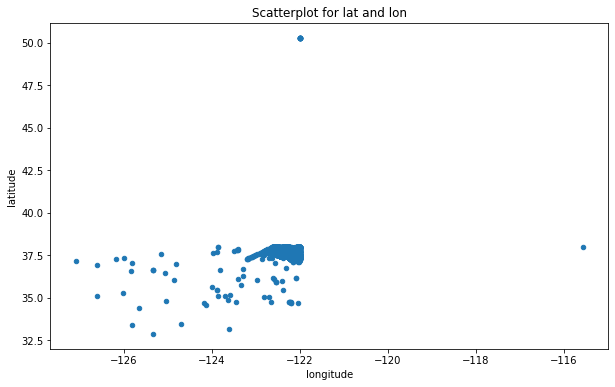

In [15]:
all_df.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,6),title='Scatterplot for lat and lon')

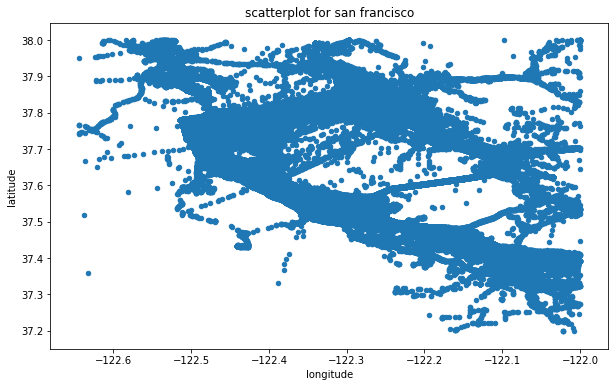

In [16]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
san_francisco_df.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,6),title='scatterplot for san francisco')

### HOUR DISTRIBUTION

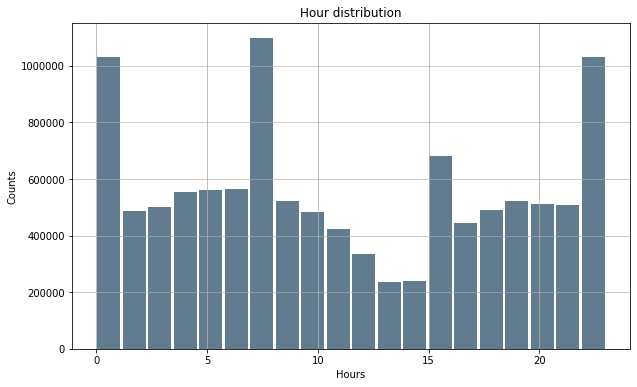

In [17]:
size, scale = 1000, 10

all_df.hour.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(10,6))
plt.title('Hour distribution')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

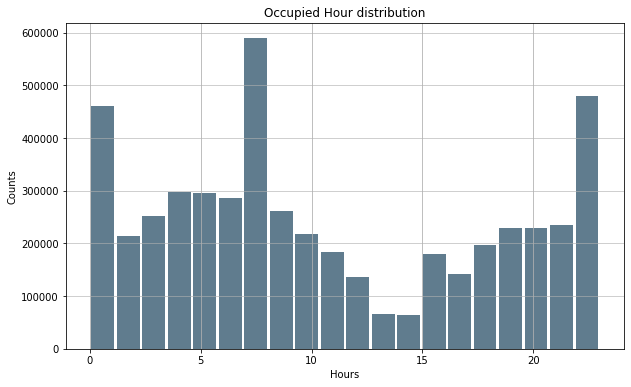

In [18]:
all_df[all_df['occupation']==1]['hour'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(10,6))
plt.title('Occupied Hour distribution')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

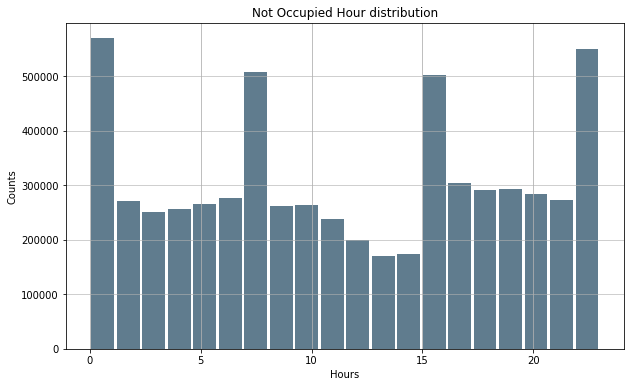

In [19]:
all_df[all_df['occupation']==0]['hour'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(10,6))
plt.title('Not Occupied Hour distribution')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

As expected, hours from the mornings is the peak time who wants to go to work,school,etc. There is a different information that around hour 16 most of the taxi cabs are not occupied. 

### CORRELATION PLOT

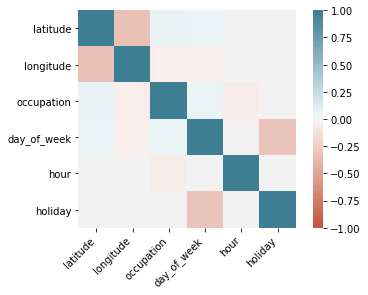

In [20]:
corr = all_df[['latitude','longitude','occupation','day_of_week','hour','holiday']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Calculating elapsed time between 2 coordinates

In [21]:
all_df.dropna(inplace=True)
all_df['next_time'] = [datetime.fromtimestamp(x) for x in all_df['next_time']]

In [22]:
all_df['time_elapsed'] = all_df['next_time']-all_df['time']

In [23]:
all_df.head()

,latitude,longitude,occupation,time,taxi_id,next_latitude,next_longitude,next_occupation_status,previous_occupation_status,next_time,distance_miles,target_column,day_of_week,hour,holiday,location,time_elapsed
1,37.79596,-122.26824,0,2008-05-17 17:26:38,new_adkavy,37.80031,-122.27920,0.0,0.0,2008-05-17 17:27:47,0.669654,37.79-122.41,5,17,0,37.8-122.27,00:01:09
2,37.80031,-122.27920,0,2008-05-17 17:27:47,new_adkavy,37.80219,-122.29588,0.0,0.0,2008-05-17 17:28:35,0.919894,37.79-122.41,5,17,0,37.8-122.28,00:00:48
3,37.80219,-122.29588,0,2008-05-17 17:28:35,new_adkavy,37.81305,-122.30235,0.0,0.0,2008-05-17 17:29:35,0.829372,37.79-122.41,5,17,0,37.8-122.3,00:01:00
4,37.81305,-122.30235,0,2008-05-17 17:29:35,new_adkavy,37.82369,-122.30235,0.0,0.0,2008-05-17 17:30:37,0.735198,37.79-122.41,5,17,0,37.81-122.3,00:01:02
5,37.82369,-122.30235,0,2008-05-17 17:30:37,new_adkavy,37.82520,-122.31218,0.0,0.0,2008-05-17 17:31:37,0.546570,37.79-122.41,5,17,0,37.82-122.3,00:01:00


### minutes that passed for all data

In [24]:
all_df.time_elapsed.sum().total_seconds()/60

17037123.166666668

I have created a taxi df to analyze taxi cabs better. I created 15 new variable from there.

### TAXI DATAFRAME 

In [25]:
taxi_df = pd.DataFrame(columns=['taxi_id','total_free_miles','total_busy_miles','total_free_time','total_busy_time',
                                'travel_count','days'])
for taxi in all_df.taxi_id.unique():
    selected_taxi_df = all_df[all_df['taxi_id']==taxi]
    total_free_miles = selected_taxi_df[selected_taxi_df['occupation']==0]['distance_miles'].sum()
    total_busy_miles = selected_taxi_df[selected_taxi_df['occupation']==1]['distance_miles'].sum()
    total_free_time = selected_taxi_df[selected_taxi_df['occupation']==0]['time_elapsed'].sum().total_seconds()/60
    total_busy_time = selected_taxi_df[selected_taxi_df['occupation']==1]['time_elapsed'].sum().total_seconds()/60  
    travel_count = selected_taxi_df[(selected_taxi_df['occupation']==1)&(selected_taxi_df['previous_occupation_status']==0)].time.count()
    max_date = selected_taxi_df.time.max()
    min_date = selected_taxi_df.time.min()
    delta = max_date - min_date
    taxi_df = taxi_df.append({'taxi_id':taxi,'total_free_miles':total_free_miles,'total_busy_miles': total_busy_miles,
                              'total_free_time':total_free_time, 'total_busy_time':total_busy_time,
                              'travel_count':travel_count,'days':delta.days}, ignore_index=True)

In [26]:
taxi_df = taxi_df.round(2)

In [27]:
taxi_df['speed_free_time'] = taxi_df['total_free_miles']/(taxi_df['total_free_time']/60)

In [28]:
taxi_df['speed_busy_time'] = taxi_df['total_busy_miles']/(taxi_df['total_busy_time']/60)

In [29]:
taxi_df['total_miles'] = taxi_df['total_free_miles'] + taxi_df['total_busy_miles']

In [30]:
taxi_df['total_time'] = taxi_df['total_free_time']+taxi_df['total_busy_time']

In [31]:
taxi_df['average_speed'] = taxi_df['total_miles']/(taxi_df['total_time']/60)

In [32]:
taxi_df['total_free_miles_per_travel'] = taxi_df['total_free_miles'] / taxi_df['travel_count']

In [33]:
taxi_df['total_busy_miles_per_travel'] = taxi_df['total_busy_miles'] / taxi_df['travel_count']

In [34]:
taxi_df = taxi_df[taxi_df['days']!=0]

In [35]:
taxi_df['active_minutes_per_day'] = taxi_df['total_busy_time']/taxi_df['days']

In [36]:
taxi_df['free_minutes_per_day'] = taxi_df['total_free_time']/taxi_df['days']

In [37]:
taxi_df.head()

,taxi_id,total_free_miles,total_busy_miles,total_free_time,total_busy_time,travel_count,days,speed_free_time,speed_busy_time,total_miles,total_time,average_speed,total_free_miles_per_travel,total_busy_miles_per_travel,active_minutes_per_day,free_minutes_per_day
0,new_adkavy,2364.63,3106.93,24643.63,8733.53,637,23,5.757179,21.344840,5471.56,33377.16,9.835876,3.71214,4.87744,379.719,1071.46
1,new_ackgrica,1566.17,2090.50,28166.95,5435.02,455,23,3.336187,23.078112,3656.67,33601.97,6.529385,3.44213,4.59451,236.305,1224.65
2,new_iafstnue,2390.77,3254.82,22224.22,12276.80,1133,23,6.454499,15.907175,5645.59,34501.02,9.818127,2.11012,2.87274,533.774,966.27
3,new_ogijtri,2623.31,2887.74,23510.83,10571.32,1086,23,6.694727,16.390044,5511.05,34082.15,9.701941,2.41557,2.65906,459.623,1022.21
4,new_umhenwed,2588.45,2986.66,23573.90,10032.62,628,23,6.588091,17.861695,5575.11,33606.52,9.953622,4.12174,4.75583,436.201,1024.95


### SAVE FILE

In [38]:
taxi_df.to_pickle('taxi.pkl')

In [39]:
taxi_df.sort_values('travel_count',ascending=False)[['taxi_id','travel_count']].head(10)

,taxi_id,travel_count
521,new_erulghiv,2143
81,new_odlorhem,1990
361,new_equioc,1986
319,new_itquirla,1650
15,new_upthin,1616
135,new_acpegho,1420
414,new_oblyaga,1399
355,new_udwadla,1396
351,new_onyacju,1330
161,new_ofikco,1277


In [40]:
taxi_df.sort_values('travel_count',ascending=False)[['taxi_id','travel_count']].tail(10)

,taxi_id,travel_count
390,new_elvgid,139
480,new_idjoat,131
72,new_ayshowg,131
60,new_eydadgio,128
65,new_inshfola,121
108,new_objoyhi,65
297,new_oowfmu,50
183,new_abcoij,27
128,new_ifeshce,7
202,new_eotcue,2


%9 percent of taxi cabs spending more miles when it's not occupied if we compare with occupied miles

In [41]:
len(taxi_df[taxi_df['total_free_miles_per_travel']>taxi_df['total_busy_miles_per_travel']])/len(taxi_df)

0.09176029962546817

all of taxi cabs have more free minutes then active minutes 

In [42]:
len(taxi_df[taxi_df['free_minutes_per_day']>taxi_df['active_minutes_per_day']])/len(taxi_df)

1.0